#### Medidas de centralidade
- Media (afetada por outliers)
- Mediana
- Moda ( valor mais frequente na amostra

#### Medidas de propagação
- DP - Mede a variabilidade dos dados (sum(yi -ym)^2/(n-1))^0.5
- Quanto maior o desvio maior, pensar em estoque de segurança para atender a demanda dos clientes

#### Conceitos

- Outliers - observaçõe que estão distante da média ( longe da mioria das) observações -- além do padrão de distribuição. Remover antes da modelagem. Identificar a causa (evento não regular) - promoção, feriado
- 1º quartil - valor aos 25 % da amostra ordenada separa os 25% de dados inferiores
- 2º quartil - mediana
- 3 º quartil - valor aos 75 % da amostra ordenada
- Percentil indica que há x% de dados inferiores Lp= (n-1)*p/100 +1

#### Regressão linear
- Utilizada para modelar a relação entre 2 variaveis( uma dependente outra independente)
- Variavel dependente (aquela que estamos tentando prever ) - vendas
- Variavel independente - exemplo: preço
- Encontre a e b com LINEST

#### Distribuições demanda e tempo

- Intermitente - Alta variabilidade no tempo da demanda e baixa variabilidade na quantidade demandada
- Lumpy - Alta variabilidade no tempo da demanda e alta variabilidade na quantidade demandada (muito dificil de prever)

In [92]:
# Demanda do suco em 500 dias 
import numpy as np
import statistics
def medidas_centralidade_e_propagação():
    suco_apple = np.random.uniform(2,500, 1000).round()
    print(f"A média é",suco_apple.mean())
    print(f"A médiana é",statistics.median(suco_apple))
    print(f"A moda é",statistics.mode(suco_apple))
    print(f"O desvio é", statistics.stdev(suco_apple))
    print(f"O range é ", max(suco_apple)-min(suco_apple))
    print(f"A variância  é", statistics.variance(suco_apple))
    print(f"50 % dos dados são inferiores à", np.percentile(suco_apple,50))
medidas_centralidade_e_propagação()

A média é 250.628
A médiana é 245.5
A moda é 178.0
O desvio é 141.29252348653552
O range é  496.0
A variância  é 19963.577193193192
50 % dos dados são inferiores à 245.5


In [91]:
amostras = [1, 2, 6, 13, 13, 14, 14, 14, 15, 15, 16, 18, 18, 18, 20,25]
def identificando_outliers(amostras):
    if len(amostras)%2 ==0:
        mediana = (amostras[int((len(amostras)-2)/2)] + amostras[int((len(amostras)-2)/2)+1])/2
        primeiro_quartil = amostras[int(0.25*(len(amostras)))-1]
        terceiro_quartil= amostras[int(0.75*(len(amostras)))-1]
    else:
        mediana = amostras[int((len(amostras) -2)/2 +1)]
        primeiro_quartil = (amostras[int(0.25*(len(amostras)))] + amostras[int(0.25*(len(amostras)))+1])/2
        terceiro_quartil= (amostras[int(0.75*(len(amostras)))-1] + amostras[int(0.75*(len(amostras)))])/2

    IIQ = terceiro_quartil - primeiro_quartil
    limiar_inferior = primeiro_quartil - 1.5*IIQ
    limiar_superior = terceiro_quartil + 1.5*IIQ

    outliers = [i for i in amostras if i < limiar_inferior or i > limiar_superior ]
    return outliers

#### Correlações

In [3]:
import pandas as pd
import seaborn as sns

In [14]:
class Documento:
    def __init__(self, name):
        self.name =name
        self.df = {}
    def carregar_dados(self):
        self.df = pd.read_csv(self.name)
        return self.df
    def limpar_dados(self):
        return self.df.dropna(axis = 0)
    def corr(self, a, b):
        x = self.df.iloc[:, [a,b]].corr()
        sns.heatmap(x)
    def cilindros(self):
        return self.df['cylenders'].value_counts()
        
        

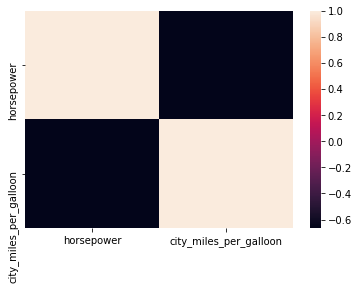

In [16]:
doc = Documento('cars.csv')
don = doc.carregar_dados()
clean = doc.limpar_dados()
doc.corr(12, 13)
cili = doc.cilindros()

#### Regressão Linear

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
pricing = pd.read_excel('pricing.xlsx', engine='openpyxl' )
X = pricing.Price.values.reshape(-1,1) #variável independente
y = pricing.Demand
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
pricing['predict']=model.predict(X)
pricing

[-10.]
500.0


,Demand,Price,predict
0,400,10.0,400.0
1,380,12.0,380.0
2,370,13.0,370.0
3,390,11.0,390.0
4,395,10.5,395.0
5,410,9.0,410.0
6,430,7.0,430.0
7,412,8.8,412.0
8,370,13.0,370.0


In [3]:
pricing.head()

,Demand,Price
0,400,10.0
1,380,12.0
2,370,13.0
3,390,11.0
4,395,10.5


#### Teste hipotese
- Verificar se a frequência com que um determinado acontecimento observado em uma amostra se desvia significativamente ou não da frequência com que ele é esperado
- hipotese nula ( segue uma distribuição normal) –frequências observadas = frequências esperadas
- if p-value > 0.05 (não rejeito a hipotese nula)
- if p-value < 0.05 (rejeito hipotese)